In [1]:
import sys
sys.path.insert(1,'C:/Users/david/Desktop/Programming Trading/trading_tool_branches/add_jupyter_notebook/trading_tool')

In [2]:
import websocket
import json

from trading_tool.stock_data_collector.config import API_KEY, SOCKET, SECRET_KEY

In [3]:
#from abc import ABC
# class TickTracker(ABC):
#     def on_open(self)

In [4]:
TICKERS = ['AAPL','SPY']
#TICKERS = ['SPY230314C00350000']

In [5]:
#SOCKET = 'wss://stream.data.alpaca.markets/v2/iex'

In [6]:
auth_data = {
            "action":"auth",
            "key":API_KEY,
            "secret":SECRET_KEY
            }
print(auth_data)

{'action': 'auth', 'key': 'PKXVUEBDSI0PAETYA49D', 'secret': 'cO8J1dZ1Pu72GjYpWVthSa46EeRyTI3nmItIpe8S'}


In [18]:
def on_open(ws):
    print("websocket opened")
    auth_data = {
            "action":"auth",
            "key":API_KEY,
            "secret":SECRET_KEY
            }
    channel_data = {
            "action":"subscribe",
            "quotes":TICKERS
            }
    ws.send(json.dumps(auth_data))
    ws.send(json.dumps(channel_data))
    print("connection made")

In [19]:
def on_close(ws):
    print("closed connection")

In [20]:
latest_tick = None
latest_timestamp = None

In [21]:
def on_message(ws,message):
    print("message received")
    print(message)
    current_tick = json.loads(message)[0]
    #tick_timestamp = datetime.utcfromtimestamp(current_tick['t']/1000).strftime("%Y-%m-%d %H:%M")
    
    latest_tick = current_tick
    #latest_timestamp = tick_timestamp

In [22]:
ws = websocket.WebSocketApp(SOCKET,on_open = on_open, on_message = on_message, on_close = on_close)
ws.run_forever()

websocket opened
connection made
message received
[{"T":"success","msg":"connected"}]
message received
[{"T":"success","msg":"authenticated"}]
message received
[{"T":"error","code":400,"msg":"invalid syntax"}]


KeyboardInterrupt: 

In [10]:
latest_tick

In [4]:
import sys
sys.path.insert(1,'C:/Users/david/Desktop/Programming Trading/trading_tool_branches/add_jupyter_notebook/trading_tool')

In [5]:
from trading_tool.stock_data_collector.td_api_config import CONSUMER_KEY

In [6]:
import nest_asyncio
nest_asyncio.apply()

In [7]:
#REDIRECT_URI = 'https://localhost'
REDIRECT_URI = 'https://127.0.0.1'
TOKEN_PATH = 'token'
ACCOUNT_NUMBER = 490637576
API_KEY = f'{CONSUMER_KEY}@AMER.OAUTHAP'

In [8]:
import tda

In [9]:
#tda.auth.client_from_login_flow()

In [10]:
from tda import auth

In [11]:
from trading_tool.stock_data_collector.td_api_config import CONSUMER_KEY

In [81]:
n = datetime.datetime.now()

In [82]:
n1 = n + datetime.timedelta(minutes=1)

In [83]:
print(n)
print(n1)

2023-03-17 09:43:57.798058
2023-03-17 09:44:57.798058


In [12]:
# with open('../scripts/token', 'r') as f:
#     t = f.read()

In [13]:
c = auth.client_from_token_file('../scripts/token', f'{CONSUMER_KEY}@AMER.OAUTHAP')

In [14]:
r = c.get_option_chain(symbol='AAPL',contract_type = c.Options.ContractType.CALL, )

In [30]:
len(r.json()['callExpDateMap'][list(r.json()['callExpDateMap'].keys())[0]].keys())

76

In [16]:
r.json()['putExpDateMap']

{}

In [17]:
r.json().keys()

dict_keys(['symbol', 'status', 'underlying', 'strategy', 'interval', 'isDelayed', 'isIndex', 'interestRate', 'underlyingPrice', 'volatility', 'daysToExpiration', 'numberOfContracts', 'putExpDateMap', 'callExpDateMap'])

In [21]:
r.json()['callExpDateMap'].keys()

dict_keys(['2023-03-17:0', '2023-03-24:7', '2023-03-31:14', '2023-04-06:20', '2023-04-14:28', '2023-04-21:35', '2023-04-28:42', '2023-05-19:63', '2023-06-16:91', '2023-07-21:126', '2023-08-18:154', '2023-09-15:182', '2023-10-20:217', '2023-11-17:245', '2023-12-15:273', '2024-01-19:308', '2024-03-15:364', '2024-06-21:462', '2024-09-20:553', '2024-12-20:644', '2025-01-17:672', '2025-06-20:826', '2025-12-19:1008'])

In [55]:
contract_dfs = []
for exp, contracts in r.json()['callExpDateMap'].items():
    for strike, contract_data in contracts.items():
        contract_df = pd.DataFrame(contract_data)
        contract_df['strike'] = strike
        contract_df['exp'] = datetime.datetime.strptime(exp.split(':')[0], '%Y-%m-%d').date()
        contract_dfs.append(contract_df.copy())

In [56]:
symbol_contracts = pd.concat(contract_dfs)

In [57]:
symbol_contracts.head().T

,0,0,0,0,0
putCall,CALL,CALL,CALL,CALL,CALL
symbol,AAPL_031723C35,AAPL_031723C40,AAPL_031723C45,AAPL_031723C50,AAPL_031723C55
description,AAPL Mar 17 2023 35 Call,AAPL Mar 17 2023 40 Call,AAPL Mar 17 2023 45 Call,AAPL Mar 17 2023 50 Call,AAPL Mar 17 2023 55 Call
exchangeName,OPR,OPR,OPR,OPR,OPR
bid,119.75,114.75,109.7,104.7,99.65
ask,119.9,114.9,109.9,105.0,100.0
last,119.85,114.85,108.85,105.0,93.85
mark,119.83,114.83,109.8,104.85,99.83
bidSize,90,90,90,90,90
askSize,90,90,90,90,90


In [58]:
symbol_contracts['exp'].value_counts()

2023-03-17    76
2023-03-24    68
2023-03-31    64
2023-04-06    64
2023-04-14    64
2023-04-28    60
2024-06-21    52
2024-01-19    52
2024-03-15    51
2025-01-17    51
2023-11-17    50
2023-05-19    49
2024-09-20    49
2023-10-20    49
2023-04-21    48
2025-06-20    47
2025-12-19    47
2023-12-15    47
2023-07-21    44
2023-08-18    43
2023-06-16    39
2023-09-15    39
2024-12-20     5
Name: exp, dtype: int64

In [61]:
exp_contracts = symbol_contracts[symbol_contracts['exp']==datetime.date(year=2023, month=3, day=24)]

In [68]:
exp_contracts[exp_contracts['totalVolume']>500]

,putCall,symbol,description,exchangeName,bid,ask,last,mark,bidSize,askSize,...,percentChange,markChange,markPercentChange,intrinsicValue,mini,inTheMoney,pennyPilot,nonStandard,strike,exp
0,CALL,AAPL_032423C150,AAPL Mar 24 2023 150 Call (Weekly),OPR,6.15,6.25,6.23,6.20,315,324,...,-10.51,-0.76,-10.94,4.82,False,True,True,False,150.0,2023-03-24
0,CALL,AAPL_032423C152.5,AAPL Mar 24 2023 152.5 Call (Weekly),OPR,4.35,4.40,4.50,4.38,271,382,...,-10.48,-0.65,-12.97,2.32,False,True,True,False,152.5,2023-03-24
0,CALL,AAPL_032423C155,AAPL Mar 24 2023 155 Call (Weekly),OPR,2.82,2.84,2.88,2.83,16,75,...,-14.29,-0.53,-15.78,-0.18,False,False,True,False,155.0,2023-03-24
0,CALL,AAPL_032423C157.5,AAPL Mar 24 2023 157.5 Call (Weekly),OPR,1.62,1.64,1.69,1.63,152,41,...,-16.95,-0.41,-19.90,-2.68,False,False,True,False,157.5,2023-03-24
0,CALL,AAPL_032423C160,AAPL Mar 24 2023 160 Call (Weekly),OPR,0.83,0.84,0.86,0.84,9,164,...,-18.10,-0.21,-20.48,-5.18,False,False,True,False,160.0,2023-03-24
0,CALL,AAPL_032423C162.5,AAPL Mar 24 2023 162.5 Call (Weekly),OPR,0.37,0.39,0.40,0.38,734,933,...,-19.19,-0.12,-23.23,-7.68,False,False,True,False,162.5,2023-03-24
0,CALL,AAPL_032423C165,AAPL Mar 24 2023 165 Call (Weekly),OPR,0.16,0.17,0.16,0.17,197,1153,...,-21.95,-0.04,-19.51,-10.18,False,False,True,False,165.0,2023-03-24
0,CALL,AAPL_032423C167.5,AAPL Mar 24 2023 167.5 Call (Weekly),OPR,0.07,0.08,0.07,0.08,48,1778,...,-17.65,-0.01,-11.76,-12.68,False,False,True,False,167.5,2023-03-24
0,CALL,AAPL_032423C170,AAPL Mar 24 2023 170 Call (Weekly),OPR,0.03,0.04,0.03,0.04,628,1533,...,-14.29,0.00,0.00,-15.18,False,False,True,False,170.0,2023-03-24


In [45]:
from tda.auth import easy_client
from tda.client import Client
from tda.streaming import StreamClient

import asyncio
import json

client = easy_client(
        api_key=API_KEY,
        redirect_uri=REDIRECT_URI,
        token_path=TOKEN_PATH)
stream_client = StreamClient(client, account_id=ACCOUNT_NUMBER)

Failed to find token file 'token'
No webdriver_func set, cannot fetch token


SystemExit: 1

In [ ]:
async def read_stream():
    await stream_client.login()
    await stream_client.quality_of_service(StreamClient.QOSLevel.EXPRESS)

    def print_message(message):
      print(json.dumps(message, indent=4))

    # Always add handlers before subscribing because many streams start sending
    # data immediately after success, and messages with no handlers are dropped.
    stream_client.add_nasdaq_book_handler(print_message)
    await stream_client.nasdaq_book_subs(['GOOG'])

    while True:
        await stream_client.handle_message()

In [ ]:
asyncio.run(read_stream())

In [84]:
import sqlite3

In [166]:
conn = sqlite3.connect('../scripts/trading_data.db')

In [167]:
options_ticks = pd.read_sql("select * from options_ticks;", conn)

In [168]:
options_ticks.shape

(73139, 45)

In [88]:
options_ticks.head().T

,0,1,2,3,4
key,AAPL_032423C160,AAPL_032423C155,AAPL_032423C162.5,AAPL_032423C157.5,AAPL_032423C165
delayed,0.0,0.0,0.0,0.0,0.0
assetMainType,OPTION,OPTION,OPTION,OPTION,OPTION
cusip,0AAPL.CO30160000,0AAPL.CO30155000,0AAPL.CO30162500,0AAPL.CO30157500,0AAPL.CO30165000
DESCRIPTION,AAPL Mar 24 2023 160 Call (Weekly),AAPL Mar 24 2023 155 Call (Weekly),AAPL Mar 24 2023 162.5 Call (Weekly),AAPL Mar 24 2023 157.5 Call (Weekly),AAPL Mar 24 2023 165 Call (Weekly)
BID_PRICE,0.81,2.87,0.35,1.64,0.13
ASK_PRICE,0.82,2.89,0.36,1.66,0.14
LAST_PRICE,0.81,2.88,0.34,1.64,0.13
HIGH_PRICE,1.3,3.85,0.88,2.37,0.29
LOW_PRICE,0.72,2.56,0.32,1.46,0.12


In [169]:
options_ticks['key'].value_counts()

AAPL_032423C155      12736
AAPL_032423C152.5    12551
AAPL_032423C160      12419
AAPL_032423C157.5    12357
AAPL_032423C162.5    11911
AAPL_032423C165      11165
Name: key, dtype: int64

In [170]:
sample_ticks = options_ticks[options_ticks['key']=='AAPL_032423C155']

In [176]:
sample_ticks = sample_ticks[sample_ticks['timestamp'].dt.day==20]

In [177]:
sample_ticks.loc[:,'timestamp'] = pd.to_datetime(sample_ticks['timestamp'])

C:\Users\david\AppData\Local\Temp\ipykernel_11088\1715155203.py:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [198]:
sample_ticks['THEORETICAL_OPTION_VALUE'] - sample_ticks['MARK']

18388   -0.003
18393      NaN
18398      NaN
18404      NaN
18410      NaN
         ...  
73109      NaN
73116      NaN
73122      NaN
73128      NaN
73135      NaN
Length: 9459, dtype: float64

In [199]:
sample_ticks['options_diff'] = sample_ticks['THEORETICAL_OPTION_VALUE'] - sample_ticks['MARK']

In [201]:
sample_ticks[['THEORETICAL_OPTION_VALUE','MARK','options_diff']].dropna()

,THEORETICAL_OPTION_VALUE,MARK,options_diff
18388,3.5220,3.525,-0.0030
18675,3.4925,3.475,0.0175
18703,3.5026,3.525,-0.0224
18933,3.5125,3.500,0.0125
19566,3.4976,3.525,-0.0274
...,...,...,...
72537,3.8028,3.825,-0.0222
72562,3.8128,3.825,-0.0122
72699,3.8628,3.875,-0.0122
72725,3.8578,3.875,-0.0172


In [202]:
sample_ticks = sample_ticks[sample_ticks['MARK'].notnull()]

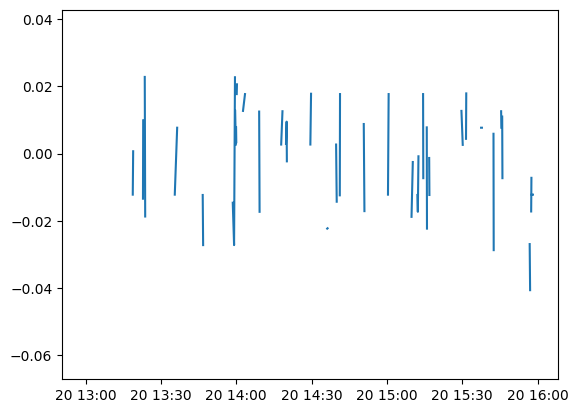

In [203]:
plt.plot(sample_ticks['timestamp'], sample_ticks['options_diff'])

In [207]:
sample_ticks[['options_diff','MARK','THEORETICAL_OPTION_VALUE','GAMMA','VOLATILITY']]

,options_diff,MARK,THEORETICAL_OPTION_VALUE,GAMMA,VOLATILITY
18388,-0.0030,3.525,3.5220,0.0608,35.1170
18640,NaN,3.500,NaN,NaN,NaN
18675,0.0175,3.475,3.4925,0.0609,35.1838
18681,NaN,3.500,NaN,NaN,NaN
18703,-0.0224,3.525,3.5026,0.0607,35.2403
...,...,...,...,...,...
72971,NaN,3.875,NaN,NaN,NaN
73004,NaN,3.900,NaN,NaN,NaN
73015,NaN,3.875,NaN,NaN,NaN
73026,-0.0123,3.900,3.8877,0.0594,34.3235


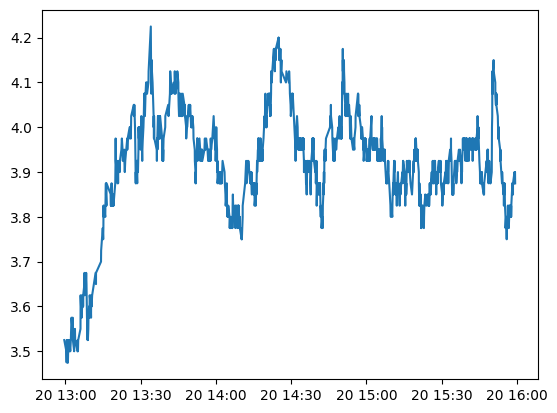

In [204]:
plt.plot(sample_ticks['timestamp'], sample_ticks['MARK'])

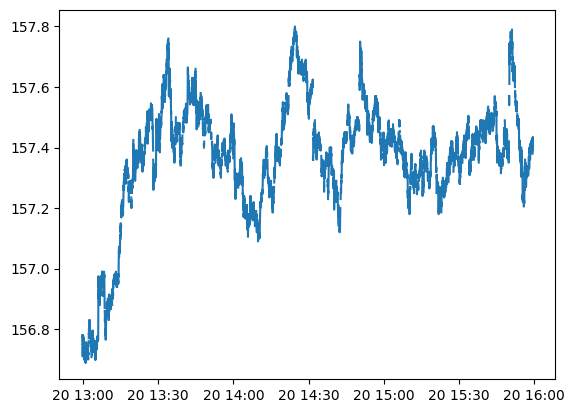

In [178]:
import matplotlib.pyplot as plt
plt.plot(sample_ticks['timestamp'], sample_ticks['UNDERLYING_PRICE'])

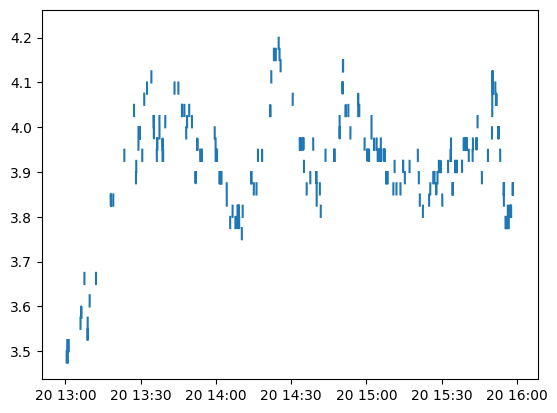

In [179]:
plt.plot(sample_ticks['timestamp'], sample_ticks['MARK'])

In [180]:
sample_ticks['underlying_norm'] = (sample_ticks['UNDERLYING_PRICE'] - sample_ticks['UNDERLYING_PRICE'].mean()) / sample_ticks['UNDERLYING_PRICE'].std()
sample_ticks['mark_norm'] = (sample_ticks['MARK'] - sample_ticks['MARK'].mean()) / sample_ticks['MARK'].std()


In [181]:
sample_ticks[['underlying_norm','mark_norm']].corr()

,underlying_norm,mark_norm
underlying_norm,1.000000,0.976189
mark_norm,0.976189,1.000000


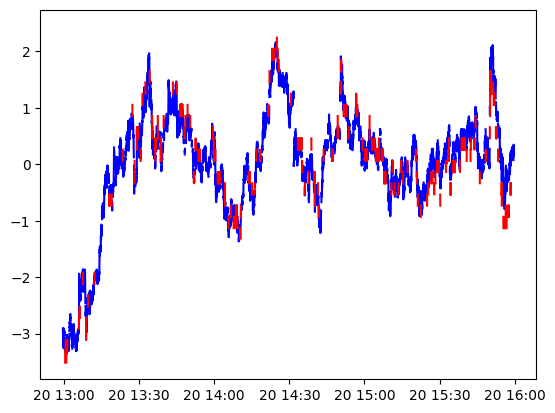

In [182]:
fig, ax = plt.subplots(1)
ax.plot(sample_ticks['timestamp'], sample_ticks['underlying_norm'], c='b')
ax.plot(sample_ticks['timestamp'], sample_ticks['mark_norm'], c='r')

In [183]:
sample_ticks = sample_ticks.sort_values(by='timestamp')

In [184]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=sample_ticks['timestamp'], y=sample_ticks['UNDERLYING_PRICE'],
                    mode='lines',
                    name='Normalized Stock Price'))
fig.add_trace(go.Scatter(x=sample_ticks['timestamp'], y=sample_ticks['MARK']+152,
                    mode='lines',
                    name='Normalized Options Price'))

fig.show()

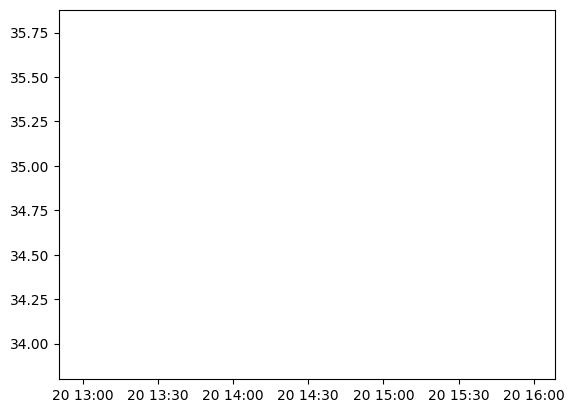

In [185]:
plt.plot(sample_ticks['timestamp'], sample_ticks['VOLATILITY'])

In [186]:
sample_ticks['VOLATILITY'].notnull().sum()

2068

In [187]:
sample_ticks[['MARK','UNDERLYING_PRICE']].corr()

,MARK,UNDERLYING_PRICE
MARK,1.000000,0.976189
UNDERLYING_PRICE,0.976189,1.000000


### Regression - Predict Stock Price Using Option Price and Find Anomolies

In [188]:
import statsmodels.api as sm

In [189]:
sample_ticks = sm.add_constant(sample_ticks)

In [190]:
df_reg = sample_ticks[['timestamp','UNDERLYING_PRICE','MARK','const']].dropna()

In [191]:
mod = sm.OLS(df_reg['UNDERLYING_PRICE'], df_reg[['MARK','const']])

In [192]:
res = mod.fit()

In [193]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       UNDERLYING_PRICE   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.290e+04
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:03:27   Log-Likelihood:                 2007.2
No. Observations:                1133   AIC:                            -4010.
Df Residuals:                    1131   BIC:                            -4000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MARK           1.4626      0.010    151.342      0.000       1.444       1.482
const        151.6365      0.038   4002.730      0.000     151.562     151.711
==============================================================================
Omnibus:                       83.647   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.882
Skew:                           0.734   Prob(JB):                     7.53e-23
Kurtosis:                       2.948   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
df_reg['pred'] = res.predict(df_reg[['MARK','const']])

In [195]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_reg['timestamp'], y=df_reg['UNDERLYING_PRICE'],
                    mode='lines',
                    name='Stock Price'))
fig.add_trace(go.Scatter(x=df_reg['timestamp'], y=df_reg['pred'],
                    mode='lines',
                    name='Pred Stock Price'))

fig.show()

In [216]:
# set up the OCO for the sell side
from tda.orders.common import one_cancels_other, first_triggers_second
from tda.orders.equities import equity_buy_limit, equity_sell_limit
oco1 = equity_sell_limit('AAPL',1,157) # this order needs to be a stop limit
oco2 = equity_sell_limit('AAPL',1,160)
oco = one_cancels_other(oco1, oco2)

entry = equity_buy_limit('AAPL',1,158)

entry_order = first_triggers_second(entry, oco)

In [223]:
from tda.orders.common import OrderType

In [243]:
t = OrderType.STOP_LIMIT

In [233]:
t == OrderType.STOP_LIMIT

True

In [244]:
t

<OrderType.STOP_LIMIT: 'STOP_LIMIT'>

In [240]:
limit_price = '50.0'

In [241]:
not (isinstance(limit_price, float) or isinstance(limit_price, int))

True

In [261]:
from tda.orders.common import StopPriceLinkBasis, EquityInstruction, OptionInstruction
from tda.orders.common import Duration, EquityInstruction
from tda.orders.common import OrderStrategyType, OrderType, Session
from tda.orders.generic import OrderBuilder

In [270]:
stop_order = stop_limit_order('AAPL',1,EquityInstruction.BUY, 158.25, StopPriceLinkBasis.MARK, OrderType.STOP_LIMIT, 158.3)

In [271]:
order_response = c.place_order(ACCOUNT_NUMBER, stop_order)

In [272]:
order_response.text

''

In [292]:
def stop_limit_order(symbol, quantity, instruction, stop_price, stop_link, order_type, limit_price = None,
                    session = Session.NORMAL, duration=Duration.DAY):
    """
    Returns a pre-filled :class:`~tda.orders.generic.OrderBuilder` for an equity
    buy stop order.
    """
    # validations of inputs
    if not isinstance(order_type, OrderType):
        raise ValueError(f"Order type should be type OrderType. Recieved type {type(order_type)}")
    if order_type == OrderType.STOP_LIMIT:
        # check to make sure the limit price is valid and not None or a non-numeric string
        try:
            limit_price = float(limit_price)
        except:
            raise ValueError("Order Type passed is Stop Limit but a valid limit price wasn't provided")
#     if order_type == OrderType.STOP and limit_price is not None:
#         logger.warning("Stop order was passed, but limit price was provided. Limit price won't be used.")
    if order_type not in (OrderType.STOP, OrderType.STOP_LIMIT):
        raise ValueError(f"Order type must be either STOP or STOP_LIMIT, but {order_type} was passed.")
    if not isinstance(stop_link, StopPriceLinkBasis):
        raise ValueError(f"stop link should be type StopPriceLinkBasis, but recieved type {type(stop_link)}")
        
    # Build the order builder object
    
    return_order =  (OrderBuilder()
                     .set_order_type(order_type)
                     .set_stop_price(stop_price)
                     .set_stop_price_link_basis(stop_link)
                     .set_session(session)
                     .set_duration(duration)
                     .set_order_strategy_type(OrderStrategyType.SINGLE))
    if isinstance(instruction, EquityInstruction):
        return_order.add_equity_leg(instruction, symbol, quantity)
    if isinstance(instruction, OptionInstruction):
        return_order.add_option_leg(instruction, symbol, quantity)
    if order_type == OrderType.STOP_LIMIT:
        return_order.set_price(limit_price)
        
    return return_order

In [307]:
def base_limit_order(price):
    return (OrderBuilder().set_order_type(OrderType.MARKET)
            .set_order_strategy_type(OrderStrategyType.SINGLE))

In [308]:
def generic_limit_order(instruction, limit_price, symbol, quantity, session, duration):
    base_order = base_limit_order(limit_price)
    
    # is it an equity order?
    if isinstance(instruction, EquityInstruction):
        base_order.add_equity_leg(instruction, symbol, quantity)
        
    # is it an option order?
    if isinstance(instruction, OptionInstruction):
        base_order.add_option_leg(instruction, symbol, quantity)
        
    return base_order.set_session(session).set_duration(duration)

In [309]:
def oco_exit_order(symbol, quantity, instruction, stop_price, stop_link, stop_order_type, stop_limit_price,
                   limit_price, session = Session.NORMAL, duration=Duration.DAY):
    # validations
    
    # build stop order
    stop_order = stop_limit_order(symbol, quantity, instruction, stop_price, stop_link, stop_order_type, stop_limit_price,
                                 session, duration)
    
    # build limit order
    limit_order = generic_limit_order(instruction, limit_price, symbol, quantity, session, duration)
    
    # return OCO from those two
    return one_cancels_other(stop_order, limit_order)

In [310]:
def bracket_order(entry_order, oco_exit_order):
    return first_triggers_second(entry, oco_exit_order)

In [393]:
import importlib
imported_module = importlib.import_module("trading_tool.live_trading.td_ameritrade")
importlib.reload(imported_module)

<module 'trading_tool.live_trading.td_ameritrade' from 'C:\\Users/david/Desktop/Programming Trading/trading_tool_branches/add_jupyter_notebook/trading_tool\\trading_tool\\live_trading\\td_ameritrade.py'>

In [394]:
from trading_tool.live_trading.td_ameritrade import stop_limit_entry_stop_limit_oco_limit_exit

In [395]:
my_bracket = stop_limit_entry_stop_limit_oco_limit_exit('AAPL',1, EquityInstruction.BUY, 159.25, 159.5,
                                                       158.5, 158.25, 162)

In [396]:
my_bracket

In [397]:
order_response = c.place_order(ACCOUNT_NUMBER, my_bracket.build())

In [399]:
order_response.text

''

In [355]:
from trading_tool.live_trading.td_ameritrade import _generic_order, 

In [376]:
session = Session.NORMAL
duration = Duration.DAY
limit_price_link = PriceLinkBasis.MARK
limit_price = 150
instruction = EquityInstruction.BUY
l = (_generic_order(session, duration)
           .set_order_type(OrderType.LIMIT)
    .set_price_link_basis(limit_price_link)
    .set_price(limit_price)
    .add_order_leg(instruction, 'AAPL', 1))

adding leg


In [377]:
l

In [ ]:
sl = 

In [352]:
l = limit_order('AAPL',1, EquityInstruction.BUY, 150)

In [354]:
print(l)

None


In [303]:
dir(EquityInstruction)

['BUY',
 'BUY_TO_COVER',
 'SELL',
 'SELL_SHORT',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [286]:
dir(OptionInstruction)

['BUY_TO_CLOSE',
 'BUY_TO_OPEN',
 'SELL_TO_CLOSE',
 'SELL_TO_OPEN',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [311]:
def entry_stop_limit_order(symbol, quantity, entry_instruction, entry_stop_price, entry_stop_link,entry_order_type,
                          entry_limit_price, exit_stop_price, exit_stop_link, exit_order_type, exit_limit_price,
                           session = Session.NORMAL, duration=Duration.DAY):
    
    # build the entry order
    entry_order = stop_limit_order(symbol, quantity, entry_instruction, entry_stop_price, entry_stop_link, entry_order_type, 
                                   entry_limit_price, session, duration)
    
    # build the oco exit order
    if 'BUY' in entry_instruction.name:
        if isinstance(entry_instruction, EquityInstruction):
            exit_instruction = EquityInstruction.SELL
        if isinstance(entry_instruction, OptionInstruction):
            exit_instruction = OptionInstruction.SELL_TO_CLOSE
    if 'SELL' in entry_instruction.name:
        if isinstance(entry_instruction, EquityInstruction):
            exit_instruction = EquityInstruction.BUY
        if isinstance(entry_instruction, OptionInstruction):
            exit_instruction = OptionInstruction.BUY_TO_CLOSE
    oco_exit_order(symbol, quantity, exit_instruction, exit_stop_price, exit_stop_link, exit_order_type, exit_limit_price,
                   exit_limit_price, session, duration)
    
    # put it all together as a bracket order
    return bracket_order, entry_order, oco_exit_order

In [312]:
my_bracket_oco = entry_stop_limit_order('AAPL',1,EquityInstruction.BUY, 159.5, StopPriceLinkBasis.MARK, OrderType.STOP,
                                       159.65, 158, StopPriceLinkBasis.MARK, OrderType.STOP, 162)

In [313]:
order_response = c.place_order(ACCOUNT_NUMBER, entry_order.build())

In [314]:
order_response.text

''

In [284]:
'BUY' in EquityInstruction.BUY.name

True

In [217]:
order_response = c.place_order(ACCOUNT_NUMBER, entry_order.build())#set_duration(Duration.GOOD_TILL_CANCEL).\
                 #  set_session(Session.SEAMLESS).build())

In [218]:
order_response.text

''

In [105]:
from tda.orders.equities import equity_buy_limit
from tda.orders.common import Duration, Session

In [111]:
# order_response = c.place_order(ACCOUNT_NUMBER, equity_buy_limit('AAPL',1,100).set_duration(Duration.GOOD_TILL_CANCEL).\
#                    set_session(Session.SEAMLESS).build())

## Gap Filling

Something important is that we only have a data point for the places in time where there was an update. That means places in between are still the latest price. We should do this by the 500 ms increment since that's the cadence of the streaming messages.